In [1]:
pip install ucimlrepo

In [10]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_data

In [11]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [12]:
y.head()

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


In [13]:
new_data=X.loc[:,['Age', 'BMI', 'PhysHlth', 'DiffWalk', 'HighChol', 'PhysActivity', 'MentHlth']]
new_data['Diabetes_binary'] = y['Diabetes_binary']
new_data.head()

,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth,Diabetes_binary
0,9,40,15,1,1,0,18,0
1,7,25,0,0,0,1,0,0
2,9,28,30,1,1,0,30,0
3,11,27,0,0,0,1,0,0
4,11,24,0,0,1,1,3,0


In [14]:
new_data.describe()

,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,8.032119,28.382364,4.242081,0.168224,0.424121,0.756544,3.184772,0.139333
std,3.054220,6.608694,8.717951,0.374066,0.494210,0.429169,7.412847,0.346294
min,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,10.000000,31.000000,3.000000,0.000000,1.000000,1.000000,2.000000,0.000000
max,13.000000,98.000000,30.000000,1.000000,1.000000,1.000000,30.000000,1.000000


We created these columns in class, so I'm not quite sure why. We, however, created an Unhealthy_Old column to identify the number of subjects above 35 years old and with 7+ unhealthy days per month (not realizing that the entire data set was below the age of 14). The other column we created was overall health by taking the average of the physical health and mental health scores.

In [15]:
new_data['Unhealthy_Old'] = ((new_data['Age'] > 35) & (new_data['PhysHlth'] > 7)).astype(int)
new_data['overall_health'] = (new_data['PhysHlth'] + new_data['MentHlth']) / 2
new_data.head()

,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth,Diabetes_binary,Unhealthy_Old,overall_health
0,9,40,15,1,1,0,18,0,0,16.5
1,7,25,0,0,0,1,0,0,0,0.0
2,9,28,30,1,1,0,30,0,0,30.0
3,11,27,0,0,0,1,0,0,0,0.0
4,11,24,0,0,1,1,3,0,0,1.5


In [16]:
avg_age = new_data['Age'].mean()
std_age = new_data['Age'].std()
new_data['Age'] = (new_data['Age'] - avg_age) / std_age

In [17]:
avg_bmi = new_data['BMI'].mean()
std_bmi = new_data['BMI'].std()
new_data['BMI'] = (new_data['BMI'] - avg_bmi) / std_bmi

In [19]:
avg_phy = new_data['PhysHlth'].mean()
std_phy = new_data['PhysHlth'].std()
new_data['PhysHlth'] = (new_data['PhysHlth'] - avg_phy) / std_phy

In [21]:
avg_men = new_data['MentHlth'].mean()
std_men = new_data['MentHlth'].std()
new_data['MentHlth'] = (new_data['MentHlth'] - avg_men) / std_men

In [23]:
avg_ovl = new_data['overall_health'].mean()
std_ovl = new_data['overall_health'].std()
new_data['overall_health'] = (new_data['overall_health'] - avg_ovl) / std_ovl

In [24]:
new_data.describe()

,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth,Diabetes_binary,Unhealthy_Old,overall_health
count,2.536800e+05,2.536800e+05,2.536800e+05,253680.000000,253680.000000,253680.000000,2.536800e+05,253680.000000,253680.0,2.536800e+05
mean,9.500792e-17,-2.455865e-16,8.828566e-17,0.168224,0.424121,0.756544,-2.083900e-17,0.139333,0.0,5.153732e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,0.374066,0.494210,0.429169,1.000000e+00,0.346294,0.0,1.000000e+00
min,-2.302427e+00,-2.478911e+00,-4.865915e-01,0.000000,0.000000,0.000000,-4.296288e-01,0.000000,0.0,-5.587764e-01
25%,-6.653479e-01,-6.631210e-01,-4.865915e-01,0.000000,0.000000,1.000000,-4.296288e-01,0.000000,0.0,-5.587764e-01
50%,-1.051634e-02,-2.091735e-01,-4.865915e-01,0.000000,0.000000,1.000000,-4.296288e-01,0.000000,0.0,-4.835391e-01
75%,6.443152e-01,3.960898e-01,-1.424739e-01,0.000000,1.000000,1.000000,-1.598269e-01,0.000000,0.0,-3.211525e-02
max,1.626563e+00,1.053425e+01,2.954584e+00,1.000000,1.000000,1.000000,3.617399e+00,1.000000,0.0,3.955462e+00


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    new_data, y,
    test_size= 0.2)

X_train.head()

,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth,Diabetes_binary,Unhealthy_Old,overall_health
169649,-0.992764,-0.814437,-0.486591,0,0,1,-0.429629,0,0,-0.558776
13023,-0.010516,-0.360489,-0.486591,0,1,1,-0.429629,0,0,-0.558776
209412,1.299147,0.396090,-0.486591,0,1,0,-0.429629,0,0,-0.558776
12644,-0.337932,0.698721,2.954584,1,1,0,-0.429629,1,0,1.698343
25213,-1.320179,-0.663121,1.233996,0,0,1,-0.429629,0,0,0.569783


In [26]:
def df_to_dataset(dataframe, labels, shuffle=True, batch_size=32):
  df = dataframe.copy()
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [27]:
import tensorflow as tf

In [28]:
inputs = {
    'Age':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='Age'),
    'BMI':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='BMI'),
    'overall_health':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='overall_health')
}

In [29]:
# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()(
    [inputs.get('Age'), inputs.get('BMI'), inputs.get('overall_health')])

hidden1 = tf.keras.layers.Dense(
    units=32, name='hidden1')(preprocessing_layers)

hidden2 = tf.keras.layers.Dense(
    units=8, name='hidden2')(hidden1)

dense_output = tf.keras.layers.Dense(
    units=1,
    name='dense_output')(hidden2)

# Define an output dictionary we'll send to the model constructor.
outputs = {
'dense_output': dense_output
}

In [36]:
dnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)
dnn_model.compile(
    # ???
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    # Binary crossentropy
    loss=tf.keras.losses.BinaryCrossentropy(),
    # Precision, Recall, F1
    metrics=[tf.keras.metrics.F1Score(), tf.keras.metrics.Accuracy()]
)

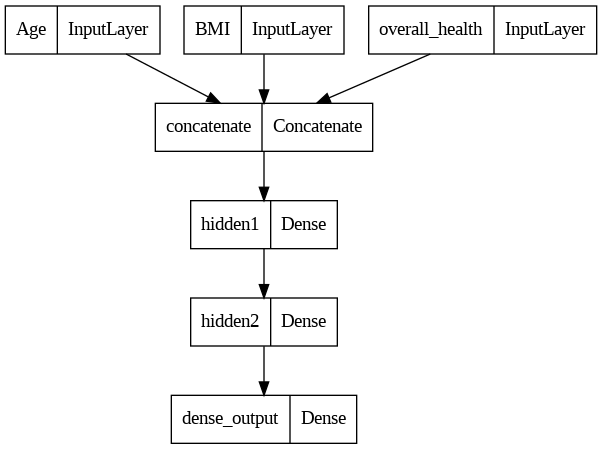

In [37]:
tf.keras.utils.plot_model(dnn_model)

I was unsure how to compare the F1 scores with the accuracy, or how to make a confucion matrix (i.e. apply a cunfucion matrix to neural netwarks). When I tried researching how to make a confucion matrix with neural networks, I only found codes that I could not apply to our model, such as by using prediction tables (which we did not use in our model). Thus, I have given up.